* Google CoLab일 경우: Drive Mount

In [1]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


* Load Saved Model

In [2]:
from tensorflow.keras.models import load_model

model2 = load_model('/content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/2. Deep Learning/Jupyter Notebook/data_Week 09/cats_and_dogs_small_2.h5')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

* Load Test Image

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

img1700_fpath = '/content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/2. Deep Learning/Jupyter Notebook/data_Week 09/test/cats/cat.1700.jpg'
img1700 = image.load_img(
    img1700_fpath,
    target_size=(150, 150)
)

img1700_tensor = image.img_to_array(img1700)

print('Original Shape:', img1700_tensor.shape)

img1700_tensor = np.expand_dims(
    img1700_tensor,
    axis=0
)

print('New Shape:', img1700_tensor.shape)

img1700_tensor = img1700_tensor / 255.0

Original Shape: (150, 150, 3)
New Shape: (1, 150, 150, 3)


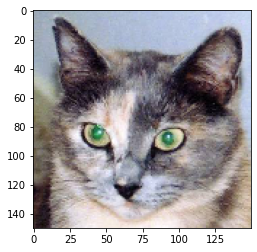

''

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img1700_tensor[0])
plt.show()
;

* Model에서 Flatten Layer 직전까지 총 8개의 Layers에 대해서 중간 그림 점검하기! (Flatten 이후로는 이미지 형태로 볼 수 없으므로)

In [8]:
from tensorflow.keras.models import Model

layeroutput_list = [
                    layer.output
                    for layer in model2.layers[:8]
]

model2_partial = Model(
    inputs=model2.input,
    outputs=layeroutput_list
)

In [9]:
img1700output_list = model2_partial.predict(img1700_tensor)
len(img1700output_list)

8

In [10]:
for iOutput in range(len(img1700output_list)):
    print(img1700output_list[iOutput].shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


* For example, Channel 13 in Layer 1 is like below!

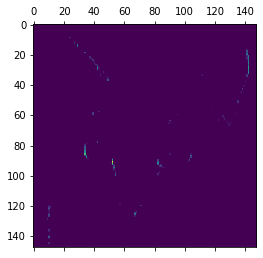

In [12]:
plt.matshow(
    img1700output_list[0][0, :, :, 12], cmap='viridis'
)

* Edge of Ears, Eyes, and Nose가 이 Filter에서 중요한 것으로 찾아내는군!

* Visualize All the Channels!

In [14]:
layername_list = []

for layer in model2.layers[:8]:
    layername_list.append(layer.name)

row_cnt = 16

for layername, layeroutput in zip(layername_list, img1700output_list):

    channel_cnt = layeroutput.shape[-1]
    output_size = layeroutput.shape[1]
    col_cnt = channel_cnt // row_cnt
    pixel_arr = np.zeros((output_size * col_cnt, output_size * row_cnt))

    for iCol in range(col_cnt):
        for iRow in range(row_cnt):

            channel_image = layeroutput[0, :, :, iCol * row_cnt + iRow]
            channel_image = (channel_image - channel_image.mean()) / channel_image.std()
            channel_image = channel_image * 64 + 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            pixel_arr[
                      iCol * output_size : (iCol + 1) * output_size,
                      iRow * output_size : (iRow + 1) * output_size
            ] = channel_image

    scale = 1.0 / output_size

    plt.figure(
        figsize=(
            scale * pixel_arr.shape[1],
            scale * pixel_arr.shape[0]
        )
    )

    plt.title(layername)
    plt.grid(False)
    plt.imshow(
        pixel_arr,
        aspect='auto',
        cmap='viridis'
    )

Output hidden; open in https://colab.research.google.com to view.

* Oh my god... 초기 Layers에서는 Edge와 Blob에 대해서 반응하다가, 가면 갈수록 추상화되는군!